




base_cmd = "freeview -v mri/brainmask.mgz -f surf/lh.white:edgecolor=yellow surf/lh.pial:edgecolor=red surf/rh.white:edgecolor=yellow surf/rh.pial:edgecolor=red -layout 1 -cc -nocursor"





-viewport sagittal -slice 100 127 127 -ss  nomri_T1_sag_1.jpg -noquit 
-viewport sagittal -slice 130 127 127 -ss  nomri_T1_sag_2.jpg -noquit  

-viewport axial -slice 127 100 127 -ss  nomri_T1_ax_1.jpg -noquit 
-viewport axial -slice 127 130 127 -ss  nomri_T1_ax_2.jpg -noquit 

-viewport coronal -slice 127 127 100 -ss  nomri_T1_cor_1.jpg -noquit 
-viewport coronal -slice 127 127 130 -ss  nomri_T1_cor_2.jpg -noquit 

-quit


### creating freeurfer command 

In [1]:
#def cmd_maker(view, slice_idx):
#    slice_str = " ".join([str(i) for i in slice_idx])
#    slice_pos = "_".join([f"{i:03d}" for i in slice_idx])
#    return f"-viewport {view} -slice {slice_str} -ss  ./img_save/T1_{view}_{slice_pos}.jpg -noquit"


def cmd_maker(view, idx):
    if view == 'sagittal' : 
        slice_idx = [idx, 127, 127]
    elif view == 'axial' : 
        slice_idx = [127, idx, 127]
    elif view == 'coronal':
        slice_idx = [127, 127, idx]
    else : 
        raise ValueError()
    slice_str = " ".join([str(i) for i in slice_idx])
    return f"-viewport {view} -slice {slice_str} -ss  ./img_save/T1_{view}_{idx:03d}.jpg -noquit"

In [2]:
cmd_maker('sagittal',12)

'-viewport sagittal -slice 12 127 127 -ss  ./img_save/T1_sagittal_012.jpg -noquit'

In [5]:
import os
os.makedirs("./img_save", exist_ok=True)
total_cmd_list = []

base_cmd = "freeview -v mri/brainmask.mgz -f surf/lh.white:edgecolor=yellow surf/lh.pial:edgecolor=red surf/rh.white:edgecolor=yellow surf/rh.pial:edgecolor=red -layout 1 -cc -nocursor"

total_cmd_list.append(base_cmd)


for i in range(50,200,1):
    total_cmd_list.append(cmd_maker('sagittal', i))
    
    total_cmd_list.append(cmd_maker('axial', i))
    
    total_cmd_list.append(cmd_maker('coronal', i))
total_cmd_list.append('-quit')

In [6]:
print('\n'.join(total_cmd_list))

freeview -v mri/brainmask.mgz -f surf/lh.white:edgecolor=yellow surf/lh.pial:edgecolor=red surf/rh.white:edgecolor=yellow surf/rh.pial:edgecolor=red -layout 1 -cc -nocursor
-viewport sagittal -slice 0 127 127 -ss  ./img_save/T1_sagittal_000.jpg -noquit
-viewport axial -slice 127 0 127 -ss  ./img_save/T1_axial_000.jpg -noquit
-viewport coronal -slice 127 127 0 -ss  ./img_save/T1_coronal_000.jpg -noquit
-viewport sagittal -slice 1 127 127 -ss  ./img_save/T1_sagittal_001.jpg -noquit
-viewport axial -slice 127 1 127 -ss  ./img_save/T1_axial_001.jpg -noquit
-viewport coronal -slice 127 127 1 -ss  ./img_save/T1_coronal_001.jpg -noquit
-viewport sagittal -slice 2 127 127 -ss  ./img_save/T1_sagittal_002.jpg -noquit
-viewport axial -slice 127 2 127 -ss  ./img_save/T1_axial_002.jpg -noquit
-viewport coronal -slice 127 127 2 -ss  ./img_save/T1_coronal_002.jpg -noquit
-viewport sagittal -slice 3 127 127 -ss  ./img_save/T1_sagittal_003.jpg -noquit
-viewport axial -slice 127 3 127 -ss  ./img_save/T1

### saving as gif

In [7]:
##running in freesurfer (shutil?)

#saving the thing after running (as gif)
import imageio
import glob
sagittal = glob.glob('/Users/eunmi/Desktop/QSIPREP/CHA_INFANT/sub-140989_well_done/infant_freesurfer/img_save/*sagittal*jpg')
axial = glob.glob('/Users/eunmi/Desktop/QSIPREP/CHA_INFANT/sub-140989_well_done/infant_freesurfer/img_save/*axial*jpg')
coronal = glob.glob('/Users/eunmi/Desktop/QSIPREP/CHA_INFANT/sub-140989_well_done/infant_freesurfer/img_save/*coronal*jpg')

In [8]:
def get_slice(name):
    return name.replace('.','_').split('_')[-2]
sagittal.sort(key = get_slice)
axial.sort(key = get_slice)
coronal.sort(key = get_slice)

sagittal_gif = []
for filename in sagittal:
    sagittal_gif.append(imageio.imread(filename))

axial_gif = []
for filename in axial:
    axial_gif.append(imageio.imread(filename))


coronal_gif = []
for filename in coronal:
    coronal_gif.append(imageio.imread(filename))


imageio.mimsave('/Users/eunmi/Desktop/QSIPREP/CHA_INFANT/sub-140989_well_done/infant_freesurfer/img_save/sagittal.gif', sagittal_gif)
imageio.mimsave('/Users/eunmi/Desktop/QSIPREP/CHA_INFANT/sub-140989_well_done/infant_freesurfer/img_save/axial.gif', axial_gif)
imageio.mimsave('/Users/eunmi/Desktop/QSIPREP/CHA_INFANT/sub-140989_well_done/infant_freesurfer/img_save/coronal.gif', coronal_gif)

/var/folders/m3/y3bh88f92_5d37clpvn8jg_00000gn/T/ipykernel_4462/3483306850.py:9: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  sagittal_gif.append(imageio.imread(filename))
/var/folders/m3/y3bh88f92_5d37clpvn8jg_00000gn/T/ipykernel_4462/3483306850.py:13: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  axial_gif.append(imageio.imread(filename))
/var/folders/m3/y3bh88f92_5d37clpvn8jg_00000gn/T/ipykernel_4462/3483306850.py:18: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning

In [89]:
list(range(10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

### saving as 9 images (#x3)


In [110]:
from PIL import Image
#slices_to_show = [50,80,100] #list의 몇번째를 하느냐? (50 (b/c began with 50)
slices_to_show = list(range(35,120,15))
crop_pixel = 70

#assume the list of image paths are already sorted (i.e. sagittal and etc already sorted)

images_to_combine = []
for idx in slices_to_show:
    for view in [sagittal, axial, coronal]: 
        images_to_combine.append(Image.open(view[idx])) #list of opened images 

# Get the size of the images
w,h = images_to_combine[0].size

##cropping##
# Calculate the new dimensions after cropping the 50-pixel boundary
new_width = w - crop_pixel*2  # 50 pixels from the left and 50 pixels from the right
new_height = h - crop_pixel*2  # 50 pixels from the top and 50 pixels from the bottom

# cropping the list of pisels 
images_to_combine = [image.crop((crop_pixel, crop_pixel, new_width, new_height)) for image in images_to_combine]
###########

new_image = Image.new('RGB',(len(slices_to_show)*new_width,3*new_height))                     

#paste the images into the new image
count = 0
for i in range(len(slices_to_show)):
    for j in range(3):
        new_image.paste(images_to_combine[count], (i*new_width,j*new_height))
        count +=1
        
new_image.save('./saved.jpg')

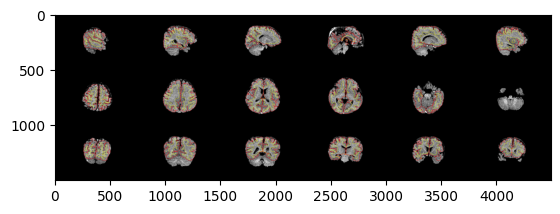

In [111]:
##for visualization
import matplotlib.pyplot as plt 
plt.imshow(new_image)


Todo
* put in subject name in the image and gif (to make it eaiser to do stuff)
* automate through all the subjects and so on 
    * capsulize, modularize (multiple subjects at once)
        * so that easier to run 
* freesurfer run using shutil